# TCGA 사이트

https://cancergenome.nih.gov/    

## TCGA-BRCA( 유방 침윤성 암종 ) 데이터 현황 및 기초 정보 다운로드

https://portal.gdc.cancer.gov/projects/TCGA-BRCA


![](01_자료수집_파일_01.jpg)

- 빨간색으로 표시한 JSON 버튼을 클릭하면 cases.2017-10-25T09_05_38.765714.json 파일이 다운로드되며,  TCGA-BRCA 데이터 현황 정보가 포함됨.


## TCGA-BRCA 요약 정보 파일 ( JSON ) 보기

- http://jsonviewer.stack.hu/ 에 가서   cases.2017-10-25T09_05_38.765714.json 파일 내용을 넣고 Viewer 탭으로 가면 보여짐.

![](01_자료수집_파일_02.jpg)



In [9]:
import json 
import pprint

json_data = open('cases.2017-10-25T09_05_38.765714.json').read()

data = json.loads(json_data)

caseCnt = len( data )
print "CASE count=" + str( caseCnt )

not_diagnoses_cnt = 0
not_reported_cnt = 0
stage_count = {} 
stage_dic = { 'stage_1' : [], 'stage_2' : [], 'stage_3' : [] , 'stage_4' : []    } 
for idx in range( caseCnt ) : 
    
    if data[ idx ].get('diagnoses'):
        diagnoses = data[ idx ]['diagnoses']
        tumor_stage = diagnoses[0]['tumor_stage']
        case_id = data[ idx ]['case_id']
        if tumor_stage == 'not reported' : 
            not_reported_cnt = 1 +  not_reported_cnt    
        else :
            if tumor_stage in ('stage i', 'stage ia', 'stage ib' ):
                stage_dic['stage_1'].append( case_id )
            elif tumor_stage in ('stage ii', 'stage iia', 'stage iib' ):
                stage_dic['stage_2'].append( case_id )
            elif tumor_stage in ('stage iii', 'stage iiia', 'stage iiib', 'stage iiic' ):
                stage_dic['stage_3'].append( case_id )
            elif tumor_stage in ('stage iv' ):
                stage_dic['stage_4'].append( case_id )
            
            
            if tumor_stage in stage_count  : 
                stage_count[ tumor_stage  ] = 1 + stage_count[ tumor_stage  ]
            else : 
                stage_count[ tumor_stage  ] = 1
                
        #print "idx=%s, diagnoses count=%s" % ( str(idx),  str( len( diagnoses ) )  )        
    else : 
        not_diagnoses_cnt = 1 +  not_diagnoses_cnt
    
print "not_diagnoses_cnt=" + str( not_diagnoses_cnt )
print "not_reported_cnt=" + str( not_reported_cnt )
print stage_count
print "stage_1_list cnt=" + str( len(stage_dic['stage_1']) )
print "stage_2_list cnt=" + str( len(stage_dic['stage_2']) )
print "stage_3_list cnt=" + str( len(stage_dic['stage_3']) )
print "stage_4_list cnt=" + str( len(stage_dic['stage_4']) )

CASE count=1098
not_diagnoses_cnt=1
not_reported_cnt=11
{u'stage ia': 86, u'stage iii': 2, u'stage ib': 7, u'stage i': 90, u'stage iia': 358, u'stage iib': 257, u'stage iiia': 155, u'stage ii': 6, u'stage iiic': 65, u'stage iiib': 27, u'stage x': 13, u'stage iv': 20}
stage_1_list cnt=183
stage_2_list cnt=621
stage_3_list cnt=249
stage_4_list cnt=20


## TCGA-BRCA의 mRNA 발현 데이터 다운로드

- https://portal.gdc.cancer.gov/query  페이징에서 Query 입력란에 아래와 같은 쿼리 입력하고 Sumbmit Query 버튼 클릭 

- cases.project.project_id in ["TCGA-BRCA"] and files.data_category in ["Transcriptome Profiling"]

- JSON 버튼 클릭하여 files.2017-10-25T10_54_46.644542.json 파일 다운로드함.

![](01_자료수집_파일_03.jpg)


- gdc_manifest_20171025_122019.txt 다운받기 

![](01_자료수집_파일_04.jpg)

![](01_자료수집_파일_05.jpg)

![](01_자료수집_파일_06.jpg)

In [10]:
with open('files.2017-10-25T10_54_46.644542.json') as data_file:
    files_json = json.load(data_file)
    
cnt = 0
stage_filename = { 'stage_1' : [], 'stage_2' : [], 'stage_3' : [] , 'stage_4' : []    } 
for file_info in files_json :
    file_name = file_info['file_name']
    case_id = file_info['cases'][0]['case_id']
    if 'FPKM-UQ.txt.gz' in file_name : 
        for stageKey in stage_dic.keys(): 
            if case_id in stage_dic[ stageKey ] :
                stage_filename[ stageKey ].append( file_name )
        
print "stage_1_file cnt=" + str( len(stage_filename['stage_1']) )
print "stage_2_file cnt=" + str( len(stage_filename['stage_2']) )
print "stage_3_file cnt=" + str( len(stage_filename['stage_3']) )
print "stage_4_file cnt=" + str( len(stage_filename['stage_4']) )

stage_1_file cnt=202
stage_2_file cnt=697
stage_3_file cnt=276
stage_4_file cnt=22


In [17]:
gdc_manifest = {}
with open('gdc_manifest_20171025_122019.txt','r') as gdc :
    cnt = 0
    head_skip = True
    for line in gdc:
        cnt += 1
        if( head_skip ) :
            head_skip = False
            continue

        #print( line )
        rows = line.strip().split('\t')
        uuid = str( rows[0] )
        file_name = rows[1]
        if cnt <= 10 : 
            print "uuid=%s, filename=%s" %(uuid, file_name )
                
        gdc_manifest[ file_name ] = uuid

uuid=000cf9c6-1373-4fb0-b759-5fd8c3799030, filename=b9e7b7b5-54e8-4459-8a21-ea3472b013d7.FPKM-UQ.txt.gz
uuid=00156c51-2686-4736-88c1-c30c81ec0a12, filename=2807d45f-9e15-4e06-8336-de7295fc7509.htseq.counts.gz
uuid=001fe63b-06c8-4ca1-861a-3d1dd0fdf5fc, filename=b4474f7c-f371-4ecb-8c2f-cd7b5d5d243b.htseq.counts.gz
uuid=002aa584-7dd3-4c62-952b-b24e5858482b, filename=a5dc521e-bee4-489c-8679-d4b90a327d33.FPKM.txt.gz
uuid=002c6f93-606c-4d4a-855a-aaf52b035c29, filename=6d27be54-6210-431e-b460-247587c5ab8d.htseq.counts.gz
uuid=002c7ead-0e16-4a3f-ae29-5ffcfdcd2e3a, filename=c45fe186-f0ba-4017-a8f6-a511c1b000eb.htseq.counts.gz
uuid=0031a3d3-b319-4109-9155-52cbb67b05cc, filename=1287d36a-6a27-4e4e-a2f7-51727ac3cc0e.FPKM-UQ.txt.gz
uuid=00331c0a-23f0-4724-9c0f-5e37f971f26f, filename=b2a6c9e3-65eb-43bd-849a-5829007379ab.htseq.counts.gz
uuid=0039181f-544b-4ee6-8d6b-ea9daf1adfe0, filename=d229a59b-4f6c-4714-8dd5-1c714a764b22.FPKM.txt.gz


- 리눅스 서버에서는 curl 명령어로 데이터를 다운받을 수 있지만, 윈도우즈 환경에서 안 되어서 GDC포탈에서 제공하는 gdc-client.exe 도구를 사용함.

- **윈도우즈 환경) gdc-client.exe  download -m gdc_manifest_20171025_122019.txt  **
- 리눅스일 때) curl --remote-name --remote-header-name 'https://api.gdc.cancer.gov/data/3b9575c1-0d7c-4288-aba6-83fde2d74af7'


In [12]:
!dir  data | tail

2017-10-25  오후 10:06    <DIR>          ff95a120-4d50-4489-b706-48276d67f1d9
2017-10-25  오후 10:06    <DIR>          ff974bfe-5a8b-488e-bf8c-ddab843f8ef2
2017-10-26  오전 03:47    <DIR>          ff9a7fe0-136a-4707-82c7-25db9797c515
2017-10-26  오전 03:41    <DIR>          ffa1d263-e812-408d-b8d1-786b65d80966
2017-10-25  오후 10:36    <DIR>          ffab607b-b483-41e9-bb8a-ec27f7f61b79
2017-10-25  오후 10:14    <DIR>          ffb4c0ac-6070-40ea-b893-be699fbea49a
2017-10-26  오전 03:42    <DIR>          ffb5a4f6-b601-4536-aade-d82cfb90e5d9
2017-10-25  오후 10:27    <DIR>          ffb69c91-52bf-4d82-be7c-3616c1fc3815
               0개 파일                   0 바이트
            6079개 디렉터리  22,288,736,256 바이트 남음


- uuid 이름의 디렉토리안에 파일이 다운로드됨.
- 각각의 stage별로 파일을 추출함.

In [53]:
import gzip
import StringIO

def makeOneLine( stage , filename, makeHead ) :
    SEPARATOR = ','
    NEWLINE = '\n'

    line = StringIO.StringIO()
    if makeHead == True : 
        line.write( 'stage' )
    else :
        line.write( stage )
    with gzip.open(filename,'r') as f:
        for fpkm_line in f:
            rows = fpkm_line.strip('\n').split('\t')
            line.write( SEPARATOR )
            if makeHead == True : 
                line.write( rows[0] )
            else : 
                line.write( rows[1] )
        
    line.write( NEWLINE )
    contents = line.getvalue()
    line.close()
    return contents

In [54]:
import shutil
import datetime
import os
import gzip
import StringIO

MRNA_CSV = 'mRNA_%s.csv' %( datetime.datetime.today().strftime('%Y%m%d%H%M') ) 
IS_FIRST = True
print MRNA_CSV 
with open(MRNA_CSV, 'w') as f:
    for  stage in stage_filename.keys(): 
        file_list = stage_filename[ stage ]
        print stage
        for filename in file_list :
            uuid = gdc_manifest[ filename ]
            src_file = './data/%s/%s' %( uuid  , filename )
            dst_file = './%s/' %( stage  )
            if os.path.isfile(src_file):
                #shutil.copy( src_file  , dst_file )
                if True == IS_FIRST : 
                    contents = makeOneLine( stage , src_file, True )    
                    f.write( contents )
                    f.flush()
                    IS_FIRST = False

                contents = makeOneLine( stage , src_file, False )
                f.write( contents )
                f.flush()
            else :
                print "no file : " + src_file                

mRNA_201710262036.csv
stage_4
stage_1
no file : ./data/7b571209-390a-40fb-a6dd-c05bff145005/a1e80ada-950c-439a-a360-f99c02ccec93.FPKM-UQ.txt.gz
stage_2
stage_3
no file : ./data/835d1ae6-7e63-401d-b70d-e90aa3007117/d487c477-1052-4b32-8df9-edf0e6872bd4.FPKM-UQ.txt.gz


In [70]:
# 3줄 출력
with open('mRNA_201710262036.csv', 'r') as f:
    print "HEADER:" + f.readline()[0:1000] + ' ...'
    print "\n"
    print "1st LINE:" + f.readline()[0:1000] + ' ...'
    print "\n"
    print "2nd LINE:" + f.readline()[0:1000] + ' ...'

HEADER:stage,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1,ENSG00000078237.5,ENSG00000146083.10,ENSG00000225275.4,ENSG00000158486.12,ENSG00000198242.12,ENSG00000259883.1,ENSG00000231981.3,ENSG00000269475.2,ENSG00000201788.1,ENSG00000134108.11,ENSG00000263089.1,ENSG00000172137.17,ENSG00000167700.7,ENSG00000234943.2,ENSG00000240423.1,ENSG00000060642.9,ENSG00000271616.1,ENSG00000234881.1,ENSG00000236040.1,ENSG00000231105.1,ENSG00000243044.1,ENSG00000182141.8,ENSG00000269416.4,ENSG00000264981.1,ENSG00000275265.1,ENSG00000185105.4,ENSG00000233540.1,ENSG00000102174.8,ENSG00000271647.1,ENSG00000166391.13,ENSG00000270469.1,ENSG00000070087.12,ENSG00000262950.1,ENSG00000255420.1,ENSG00000280038.1,ENSG00000266261.1,ENSG00000153561.11,ENSG00000269148.1,ENSG00000274458.1,ENSG00000273406.1,ENSG00000179262.8,ENSG00000214198.6,ENSG00000278099.1,ENSG00000166368.2,ENSG00000206072.11,ENSG00000234900.1,ENSG00000258630.1,ENSG00000127511.8,ENSG00000220993.1,ENSG00000225269.2,ENSG0

## mRNA-Seq 데이터  설명

- https://docs.gdc.cancer.gov/Data/PDF/Data_UG.pdf
    
![](01_자료수집_02.jpg)

![](01_자료수집_03.jpg)


## 유방암 환자의  mRNA 데이터 EDA 

In [ ]:
library(data.table)
library(ggplot2)
library(reshape2)

In [18]:
brca.rawdata <- fread('mRNA_201710262036.csv', header = TRUE)
head( brca.rawdata[, 1:5], 6  )

Read 1195 rows and 60484 (of 60484) columns from 0.628 GB file in 00:01:29


,stage,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000273842.1
1,stage_4,1379.031,191.345,86877.46,0
2,stage_4,0,0,147167.5,0
3,stage_4,1243.391,517.5732,111668.3,0
4,stage_4,0,0,37754.13,0
5,stage_4,0,0,92800.19,0
6,stage_4,2957.377,0,44666.76,0


In [20]:
brca.stage <- brca.rawdata[ ,1]
brca.mRNA <- brca.rawdata[ ,-1]

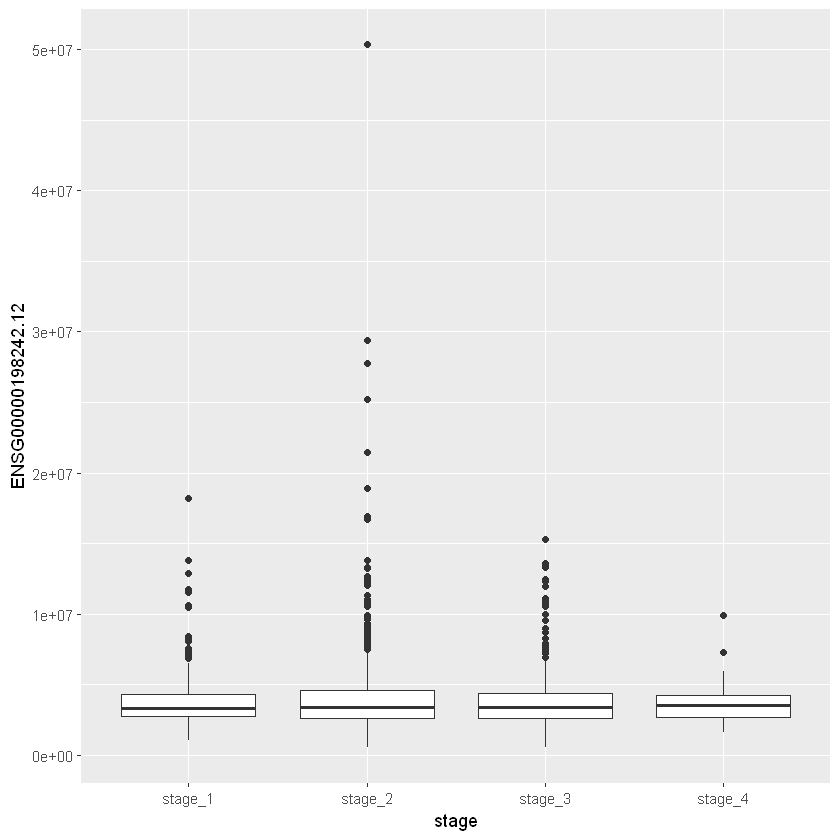

In [44]:
qplot(stage, ENSG00000198242.12, data = brca.rawdata , geom="boxplot")

In [22]:
torf <- rep( TRUE, length(brca.mRNA) )
length(torf)
idx = 1 
for( gene in brca.mRNA ){
    zero_num <- 0
    for(val in  gene ){
        if(val ==0){
            zero_num <- zero_num + 1
        }
    }
    if(zero_num/length(gene)> 0.9  ){
        torf[idx] <- FALSE
    } else {
        torf[idx] <- TRUE
    }
    idx =  1 + idx    
}

[1] 60483

In [43]:
brca.valid_mRNA <- brca.mRNA[ , torf, with=FALSE ]
dim( brca.valid_mRNA )
head( brca.valid_mRNA[ , 1:7 ], 6  )

[1]  1195 43616

,ENSG00000242268.2,ENSG00000270112.3,ENSG00000167578.15,ENSG00000078237.5,ENSG00000146083.10,ENSG00000158486.12,ENSG00000198242.12
1,1379.031,191.345,86877.46,66073.07,419726.6,632.6706,5926102
2,0,0,147167.5,98540.75,212511.5,1950.178,4271222
3,1243.391,517.5732,111668.3,113891.8,201985.1,2065.391,4756656
4,0,0,37754.13,100629.9,245029.7,210.502,3435028
5,0,0,92800.19,23562.54,99051.22,226.7302,2645662
6,2957.377,0,44666.76,90296.35,188086,456.1596,3907081


In [25]:
mutiboxplot <- function(mat){
    df = melt(mat)
    df = transform(df, variable=factor(variable, levels=as.character(variable)))
    
    p = ggplot(df, aes(x=variable, y=value, fill=variable))+ 
        geom_boxplot()+
        ggtitle('mRNA expression') +xlab('')+theme_bw()+
        theme(axis.text.x=element_text(angle=40, hjust=1, size=13), legend.position='none')
    show(p)
}

In [37]:
showBoxplot <- function( mRAN, from, to ) {
    options(warn = -1) 
    mat = mRAN[  , from:to ]
    colnames(mat) = paste0('gene', from:to )
    mutiboxplot(mat)
}

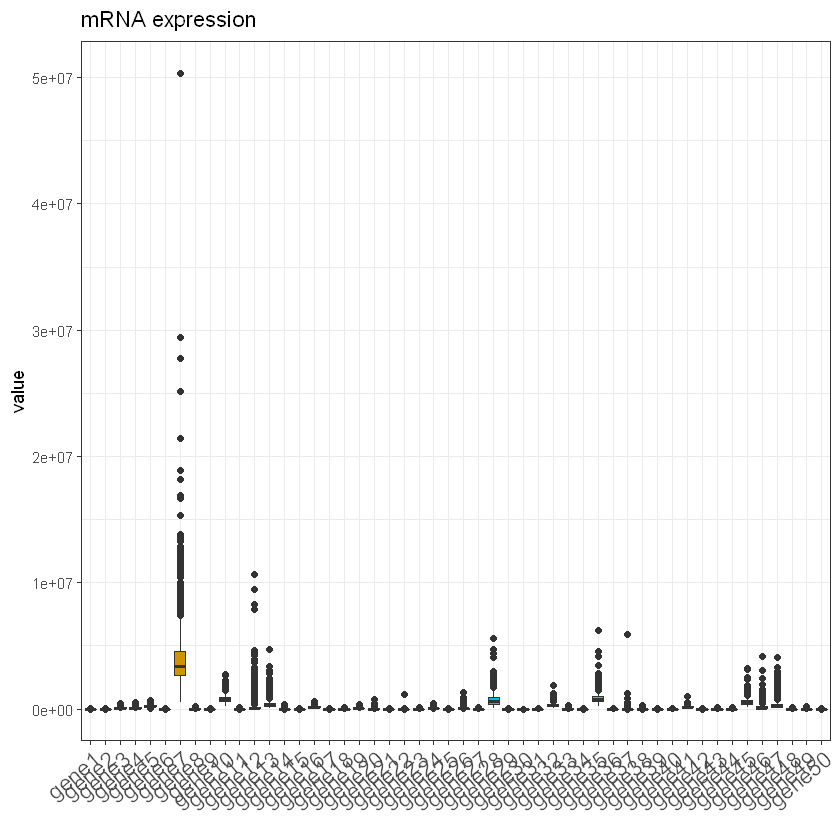

In [38]:
showBoxplot( brca.valid_mRNA, 1,50 )

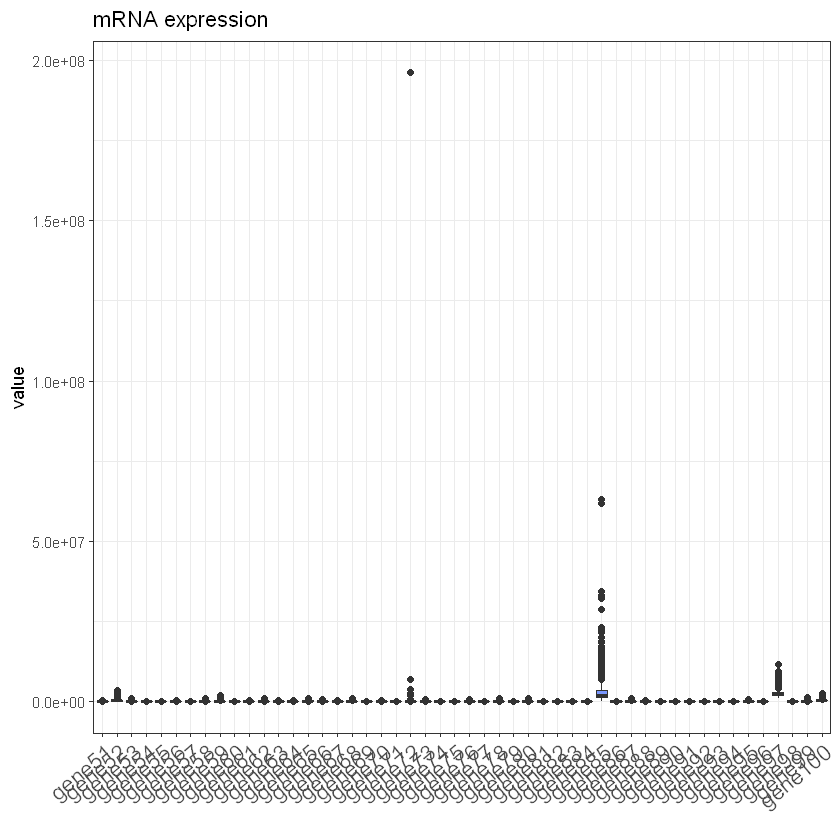

In [39]:
showBoxplot( brca.valid_mRNA, 51,100 )